In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_rows', 200)

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: в этом году он открывает 100 новых скважин по добыче газа. Однако в целях оптимизации расходов и для потенциального повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы потенциально сильнейшим образом влияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста по построению моделей машинного обучения.

Признаки:

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс (кгм);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

### Ваша задача — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

In [5]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.080,2.920,2.800,81.400,1.160,2.310,4165.196
1,2,12.380,3.530,3.220,46.170,0.890,1.880,3561.146
2,3,14.020,2.590,4.010,72.800,0.890,2.720,4284.349
3,4,17.670,6.750,2.630,39.810,1.080,1.880,5098.681
4,5,17.520,4.570,3.180,10.940,1.510,1.900,3406.133


In [6]:
data.corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000,0.069,0.078,0.041,-0.079,0.023,-0.007,0.027
Por,0.069,1.000,0.761,-0.462,-0.219,0.712,0.112,0.862
Perm,0.078,0.761,1.000,-0.240,-0.124,0.472,0.051,0.727
AI,0.041,-0.462,-0.240,1.000,0.128,-0.532,0.499,-0.391
Brittle,-0.079,-0.219,-0.124,0.128,1.000,-0.214,0.318,0.237
TOC,0.023,0.712,0.472,-0.532,-0.214,1.000,0.299,0.654
VR,-0.007,0.112,0.051,0.499,0.318,0.299,1.000,0.323
Prod,0.027,0.862,0.727,-0.391,0.237,0.654,0.323,1.000


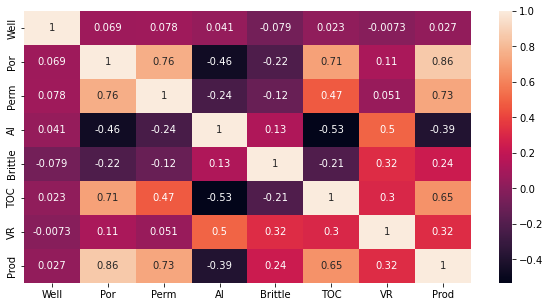

In [7]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(), annot = True);